# Artificial Neural Networks (ANN) 

In [49]:
# Importing libraries and packages:
#import pickle
from pickle import dump, load

# "Sequential" models let us define a stack of neural network layers
from keras.models import Sequential

# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np

# import some utilities to transform/preprocess our data:

from keras.utils import np_utils
import matplotlib.pyplot as plt

print('All modules imported.')

All modules imported.


In [50]:
# Collect data

data_dir = 'TFS_Dataset/'
pickle_dir = 'TFS_Dataset/Pickle/'
model_dir = 'TFS_Dataset/Model/'

In [51]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

# reshape image size
n_features = 1024  ## 32 * 32 = 1024

## Load Pickle file data


In [52]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train_gray.pkl'), 'rb')
X_train_gray,y_train_gray = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test_gray.pkl'), 'rb')
X_test_gray,y_test_gray = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [53]:
print("Number of Training examples =", len(X_train_gray))
print("Number of Testing examples =", len(X_test_gray))
print("Number of Validation examples =", len(X_val))
print("Image data shape =", (X_train_gray.shape))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Number of Validation examples = 43
Image data shape = (39209, 32, 32)
Number of classes = 43


## Reshape training, testing and validation data


In [54]:
print("X_train_gray shape before reshape : ",X_train_gray.shape)
print("X_test_gray shape before reshape: ",X_test_gray.shape)

X_train_gray shape before reshape :  (39209, 32, 32)
X_test_gray shape before reshape:  (12630, 32, 32)


In [55]:
# building the input vector from the 32x32 pixels
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], n_features)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], n_features)

In [56]:
print("X_train_gray shape after reshape : ",X_train_gray.shape)
print("X_test_gray shape after reshape: ",X_test_gray.shape)


X_train_gray shape after reshape :  (39209, 1024)
X_test_gray shape after reshape:  (12630, 1024)


In [57]:
X_train_gray

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [255, 255, 252, ..., 226, 221, 222],
       [109, 128, 202, ...,  46,  49,  46],
       [174, 204, 203, ..., 105, 101, 100]], dtype=uint8)

## Standardize the data

In [58]:
# Scale the values between 0 and 1
X_train_gray = X_train_gray.astype('float32')
X_test_gray = X_test_gray.astype('float32')
X_train_gray = X_train_gray / 255 
X_test_gray = X_test_gray / 255

In [59]:
X_train_gray

array([[0.16862746, 0.2       , 0.1882353 , ..., 0.18039216, 0.23137255,
        0.20392157],
       [0.46666667, 0.60784316, 0.8156863 , ..., 0.7019608 , 0.6862745 ,
        0.77254903],
       [0.48235294, 0.6901961 , 0.627451  , ..., 0.14901961, 0.15294118,
        0.15294118],
       ...,
       [1.        , 1.        , 0.9882353 , ..., 0.8862745 , 0.8666667 ,
        0.87058824],
       [0.42745098, 0.5019608 , 0.7921569 , ..., 0.18039216, 0.19215687,
        0.18039216],
       [0.68235296, 0.8       , 0.79607844, ..., 0.4117647 , 0.39607844,
        0.39215687]], dtype=float32)

In [60]:
y_train_gray.shape, y_test_gray.shape

((39209,), (12630,))

In [61]:
# Converting the output labels into one hot encoding

y_train_gray = np_utils.to_categorical(y_train_gray,NUM_CATEGORIES)

y_test_gray = np_utils.to_categorical(y_test_gray,NUM_CATEGORIES)


In [62]:
# Label after OneHotEncoding:
print ("Y_train_gray: ",y_train_gray.shape)
print (y_train_gray[:5])

# Label after OneHotEncoding:
print ("T_test_gray: ",y_test_gray.shape)
print (y_test_gray[:5])

Y_train_gray:  (39209, 43)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
T_test_gray:  (12630, 43)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 

## Define the Network Architecture (model):

In [63]:
input_size = n_features

In [64]:
def ann_model_creator():
    model = Sequential()

    model.add(Dense(100, input_dim = input_size))
    model.add(Activation('sigmoid'))
    model.add(Dense(43, input_dim = 100)) 
    model.add(Activation('softmax'))

    # compile the model
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    
    # model summury
    print(model.summary())
    
    return model


In [65]:
# define the ANN model

ann_model = ann_model_creator()

Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_330 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_331 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_331 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
%%time

fitted_model_ann = ann_model.fit(X_train_gray, y_train_gray, validation_split=0.20, batch_size=32, epochs=15, verbose=1)

ann_model.save("ANN_model_Keras&Tensorflow.h5")

Epoch 1/15
981/981 [==============================] - 2s 1ms/step - loss: 3.0955 - accuracy: 0.2147 - val_loss: 1.9574 - val_accuracy: 0.5045
Epoch 2/15
981/981 [==============================] - 1s 1ms/step - loss: 1.7278 - accuracy: 0.5752 - val_loss: 1.2864 - val_accuracy: 0.6866
Epoch 3/15
981/981 [==============================] - 1s 973us/step - loss: 1.1495 - accuracy: 0.7312 - val_loss: 0.9399 - val_accuracy: 0.7915
Epoch 4/15
981/981 [==============================] - 1s 1ms/step - loss: 0.8715 - accuracy: 0.8030 - val_loss: 0.7435 - val_accuracy: 0.8460
Epoch 5/15
981/981 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.8491 - val_loss: 0.6379 - val_accuracy: 0.8637
Epoch 6/15
981/981 [==============================] - 1s 1ms/step - loss: 0.5821 - accuracy: 0.8743 - val_loss: 0.5874 - val_accuracy: 0.8659
Epoch 7/15
981/981 [==============================] - 1s 1ms/step - loss: 0.5146 - accuracy: 0.8865 - val_loss: 0.4993 - val_accuracy: 0.8859
Epoc

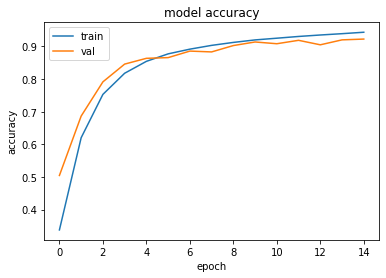

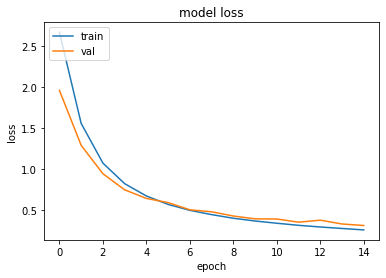

In [67]:
# summarize history for accuracy
plt.plot(fitted_model_ann.history['accuracy'])
plt.plot(fitted_model_ann.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model_ann.history['loss'])
plt.plot(fitted_model_ann.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# print(fitted_model.history)

## Testing, Prediction, Evaluation:

In [68]:
# Prediction:
y_pridict = ann_model.predict(X_test_gray, verbose=1)
print (y_pridict.shape)

395/395 [==============================] - 0s 512us/step
(12630, 43)


In [69]:
# Evaluation:
score = ann_model.evaluate(X_test_gray, y_test_gray, verbose=1)
print('The accuracy is: ', score[1])

395/395 [==============================] - 0s 656us/step - loss: 0.6551 - accuracy: 0.8478
The accuracy is:  0.8478226661682129


# Find Best epoch and bacth_size  by using Grid Search CV 

In [70]:
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV

seed = 10
np.random.seed(seed)

# define model
ann_model = KerasClassifier(build_fn = ann_model_creator, verbose=1)

In [71]:
batch_size = [30 ,32, 50 ,64, 100 ]
epochs = [10 , 15 , 20, 30, 50, 100]

# create a dictionary for grid parameter:
param_grid = dict(epochs=epochs,batch_size = batch_size)
print(param_grid,'\n')

{'epochs': [10, 15, 20, 30, 50, 100], 'batch_size': [30, 32, 50, 64, 100]} 



In [72]:
%%time
# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(ann_model, param_grid, cv=10, scoring='neg_log_loss')

# fit the grid (start the grid search):
grid.fit(X_train_gray, y_train_gray)


Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_332 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_333 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_333 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 949us/step - loss: 3.0358 - accuracy: 0.2328
Epoch 2/10
1177/1177 [==============================] - 1s 867us/step - loss: 1.5720 - accuracy: 0.6207
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_167"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_334 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_334 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_335 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_335 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 928us/step - loss: 2.9905 - accuracy: 0.2314
Epoch 2/10
1177/1177 [==============================] - 1s 902us/step - loss: 1.5207 - accuracy: 0.6327
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_168"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_336 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_336 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_337 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_337 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 2s 931us/step - loss: 3.0378 - accuracy: 0.2232
Epoch 2/10
1177/1177 [==============================] - 1s 935us/step - loss: 1.5793 - accuracy: 0.6141
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_169"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_338 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_339 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_339 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 862us/step - loss: 3.0129 - accuracy: 0.2339
Epoch 2/10
1177/1177 [==============================] - 1s 908us/step - loss: 1.5580 - accuracy: 0.6232
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_340 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_341 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_341 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 946us/step - loss: 3.0058 - accuracy: 0.2368
Epoch 2/10
1177/1177 [==============================] - 1s 991us/step - loss: 1.5475 - accuracy: 0.6218
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_342 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_342 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_343 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_343 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 870us/step - loss: 3.0138 - accuracy: 0.2329
Epoch 2/10
1177/1177 [==============================] - 1s 866us/step - loss: 1.5586 - accuracy: 0.6261
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_172"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_344 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_345 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_345 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 917us/step - loss: 3.0169 - accuracy: 0.2325
Epoch 2/10
1177/1177 [==============================] - 1s 910us/step - loss: 1.5623 - accuracy: 0.6184
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_346 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_346 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_347 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_347 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 896us/step - loss: 2.9828 - accuracy: 0.2466
Epoch 2/10
1177/1177 [==============================] - 1s 911us/step - loss: 1.5275 - accuracy: 0.6304
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_174"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_348 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_349 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_349 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 914us/step - loss: 3.0056 - accuracy: 0.2273
Epoch 2/10
1177/1177 [==============================] - 1s 919us/step - loss: 1.5441 - accuracy: 0.6282
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_350 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_350 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_351 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_351 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1177/1177 [==============================] - 1s 884us/step - loss: 2.9828 - accuracy: 0.2447
Epoch 2/10
1177/1177 [==============================] - 1s 854us/step - loss: 1.5494 - accuracy: 0.6272
Epoch 3/10
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_352 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_352 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_353 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_353 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 927us/step - loss: 3.0103 - accuracy: 0.2354
Epoch 2/15
1177/1177 [==============================] - 1s 902us/step - loss: 1.5689 - accuracy: 0.6128
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_177"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_354 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_355 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_355 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 931us/step - loss: 3.0013 - accuracy: 0.2340
Epoch 2/15
1177/1177 [==============================] - 1s 865us/step - loss: 1.5668 - accuracy: 0.6246
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_356 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_356 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_357 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_357 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 922us/step - loss: 3.0138 - accuracy: 0.2284
Epoch 2/15
1177/1177 [==============================] - 1s 916us/step - loss: 1.5361 - accuracy: 0.6294
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_179"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_358 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_358 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_359 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_359 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 896us/step - loss: 3.0187 - accuracy: 0.2287
Epoch 2/15
1177/1177 [==============================] - 1s 893us/step - loss: 1.5369 - accuracy: 0.6358
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 591us/step
Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_360 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_360 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_361 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_361 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 862us/step - loss: 3.0060 - accuracy: 0.2355
Epoch 2/15
1177/1177 [==============================] - 1s 861us/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_362 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_362 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_363 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_363 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 851us/step - loss: 2.9974 - accuracy: 0.2399
Epoch 2/15
1177/1177 [==============================] - 1s 859us/step - loss: 1.5328 - accuracy: 0.6285
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_364 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_365 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_365 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 974us/step - loss: 2.9928 - accuracy: 0.2394
Epoch 2/15
1177/1177 [==============================] - 1s 921us/step - loss: 1.5458 - accuracy: 0.6275
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_366 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_366 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_367 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_367 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 851us/step - loss: 3.0214 - accuracy: 0.2295
Epoch 2/15
1177/1177 [==============================] - 1s 869us/step - loss: 1.5725 - accuracy: 0.6190
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_184"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_368 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_368 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_369 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_369 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 889us/step - loss: 3.0323 - accuracy: 0.2261
Epoch 2/15
1177/1177 [==============================] - 1s 875us/step - loss: 1.5801 - accuracy: 0.6111
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_370 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_370 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_371 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_371 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1177/1177 [==============================] - 1s 965us/step - loss: 3.0124 - accuracy: 0.2329
Epoch 2/15
1177/1177 [==============================] - 1s 923us/step - loss: 1.5787 - accuracy: 0.6120
Epoch 3/15
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_186"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_372 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_373 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_373 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 921us/step - loss: 3.0177 - accuracy: 0.2329
Epoch 2/20
1177/1177 [==============================] - 1s 953us/step - loss: 1.5585 - accuracy: 0.6171
Epoch 3/20
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_374 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_374 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_375 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_375 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 1ms/step - loss: 3.0135 - accuracy: 0.2311
Epoch 2/20
1177/1177 [==============================] - 1s 914us/step - loss: 1.5511 - accuracy: 0.6215
Epoch 3/20
1177/1177 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_376 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_376 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_377 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 881us/step - loss: 2.9775 - accuracy: 0.2402
Epoch 2/20
1177/1177 [==============================] - 1s 875us/step - loss: 1.5476 - accuracy: 0.6258
Epoch 3/20
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_189"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_378 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_378 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_379 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_379 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 2s 1ms/step - loss: 3.0202 - accuracy: 0.2359
Epoch 2/20
1177/1177 [==============================] - 1s 929us/step - loss: 1.5712 - accuracy: 0.6214
Epoch 3/20
1177/1177 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_380 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_380 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_381 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_381 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 2s 1ms/step - loss: 2.9867 - accuracy: 0.2411
Epoch 2/20
1177/1177 [==============================] - 1s 1ms/step - loss: 1.5440 - accuracy: 0.6242
Epoch 3/20
1177/1177 [=============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 660us/step
Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_382 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_382 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_383 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_383 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 1ms/step - loss: 3.0144 - accuracy: 0.2334
Epoch 2/20
1177/1177 [==============================] - 1s 1ms/step - loss: 1.54

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_192"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_384 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_384 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_385 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_385 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 970us/step - loss: 3.0199 - accuracy: 0.2317
Epoch 2/20
1177/1177 [==============================] - 1s 1ms/step - loss: 1.5556 - accuracy: 0.6192
Epoch 3/20
1177/1177 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_386 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_386 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_387 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_387 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 924us/step - loss: 2.9964 - accuracy: 0.2366
Epoch 2/20
1177/1177 [==============================] - 1s 907us/step - loss: 1.5317 - accuracy: 0.6302
Epoch 3/20
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_194"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_388 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_388 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_389 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_389 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 902us/step - loss: 3.0111 - accuracy: 0.2346
Epoch 2/20
1177/1177 [==============================] - 1s 907us/step - loss: 1.5402 - accuracy: 0.6289
Epoch 3/20
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_195"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_390 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_390 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_391 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_391 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1177/1177 [==============================] - 1s 978us/step - loss: 3.0041 - accuracy: 0.2361
Epoch 2/20
1177/1177 [==============================] - 1s 934us/step - loss: 1.5241 - accuracy: 0.6370
Epoch 3/20
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_392 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_392 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_393 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_393 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 927us/step - loss: 3.0082 - accuracy: 0.2334
Epoch 2/30
1177/1177 [==============================] - 1s 948us/step - loss: 1.5539 - accuracy: 0.6219
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_197"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_394 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_395 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_395 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 922us/step - loss: 3.0077 - accuracy: 0.2331
Epoch 2/30
1177/1177 [==============================] - 1s 947us/step - loss: 1.5439 - accuracy: 0.6270
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_396 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_396 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_397 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_397 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 871us/step - loss: 3.0173 - accuracy: 0.2269
Epoch 2/30
1177/1177 [==============================] - 1s 866us/step - loss: 1.5490 - accuracy: 0.6255
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_199"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_398 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_398 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_399 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_399 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 784us/step - loss: 3.0115 - accuracy: 0.2334
Epoch 2/30
1177/1177 [==============================] - 1s 778us/step - loss: 1.5347 - accuracy: 0.6298
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_200"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_400 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_400 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_401 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_401 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 899us/step - loss: 2.9984 - accuracy: 0.2383
Epoch 2/30
1177/1177 [==============================] - 1s 883us/step - loss: 1.5404 - accuracy: 0.6127
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_402 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_402 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_403 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_403 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 972us/step - loss: 3.0101 - accuracy: 0.2345
Epoch 2/30
1177/1177 [==============================] - 1s 926us/step - loss: 1.5511 - accuracy: 0.6197
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 574us/step
Model: "sequential_202"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_404 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_404 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_405 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_405 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 909us/step - loss: 2.9921 - accuracy: 0.2435
Epoch 2/30
1177/1177 [==============================] - 1s 904us/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_203"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_406 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_406 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_407 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_407 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 760us/step - loss: 3.0141 - accuracy: 0.2344
Epoch 2/30
1177/1177 [==============================] - 1s 743us/step - loss: 1.5446 - accuracy: 0.6297
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_204"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_408 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_408 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_409 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_409 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 724us/step - loss: 3.0149 - accuracy: 0.2308
Epoch 2/30
1177/1177 [==============================] - 1s 721us/step - loss: 1.5611 - accuracy: 0.6167
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_410 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_410 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_411 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_411 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1177/1177 [==============================] - 1s 742us/step - loss: 3.0313 - accuracy: 0.2334
Epoch 2/30
1177/1177 [==============================] - 1s 724us/step - loss: 1.5774 - accuracy: 0.6141
Epoch 3/30
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_412 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_412 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_413 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_413 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 916us/step - loss: 3.0060 - accuracy: 0.2305
Epoch 2/50
1177/1177 [==============================] - 1s 873us/step - loss: 1.5626 - accuracy: 0.6166
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_414 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_414 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_415 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_415 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 939us/step - loss: 3.0083 - accuracy: 0.2310
Epoch 2/50
1177/1177 [==============================] - 1s 875us/step - loss: 1.5589 - accuracy: 0.6252
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_208"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_416 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_416 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_417 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_417 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 854us/step - loss: 2.9720 - accuracy: 0.2450
Epoch 2/50
1177/1177 [==============================] - 1s 862us/step - loss: 1.5254 - accuracy: 0.6311
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_209"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_418 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_418 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_419 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_419 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 868us/step - loss: 2.9986 - accuracy: 0.2430
Epoch 2/50
1177/1177 [==============================] - 1s 929us/step - loss: 1.5341 - accuracy: 0.6295
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_210"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_420 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_420 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_421 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_421 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 916us/step - loss: 3.0063 - accuracy: 0.2332
Epoch 2/50
1177/1177 [==============================] - 1s 936us/step - loss: 1.5462 - accuracy: 0.6269
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_422 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_422 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_423 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_423 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 911us/step - loss: 3.0293 - accuracy: 0.2353
Epoch 2/50
1177/1177 [==============================] - 1s 985us/step - loss: 1.5469 - accuracy: 0.6253
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_424 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_424 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_425 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_425 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 897us/step - loss: 3.0195 - accuracy: 0.2253
Epoch 2/50
1177/1177 [==============================] - 1s 930us/step - loss: 1.5431 - accuracy: 0.6220
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 628us/step
Model: "sequential_213"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_426 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_426 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_427 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_427 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 1ms/step - loss: 2.9981 - accuracy: 0.2347
Epoch 2/50
1177/1177 [==============================] - 1s 972us/step - loss: 1.

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_214"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_428 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_428 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_429 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_429 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 895us/step - loss: 3.0166 - accuracy: 0.2378
Epoch 2/50
1177/1177 [==============================] - 1s 905us/step - loss: 1.5582 - accuracy: 0.6220
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_215"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_430 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_431 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_431 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1177/1177 [==============================] - 1s 978us/step - loss: 2.9692 - accuracy: 0.2470
Epoch 2/50
1177/1177 [==============================] - 1s 914us/step - loss: 1.5418 - accuracy: 0.6265
Epoch 3/50
1177/1177 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_432 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_433 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_433 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 911us/step - loss: 2.9927 - accuracy: 0.2422
Epoch 2/100
1177/1177 [==============================] - 1s 931us/step - loss: 1.5603 - accuracy: 0.6180
Epoch 3/100
1177/1177 [======

1177/1177 [==============================] - 1s 1ms/step - loss: 0.0354 - accuracy: 0.9932
Epoch 71/100
1177/1177 [==============================] - 1s 912us/step - loss: 0.0445 - accuracy: 0.9897
Epoch 72/100
1177/1177 [==============================] - 1s 862us/step - loss: 0.0411 - accuracy: 0.9900
Epoch 73/100
1177/1177 [==============================] - 1s 861us/step - loss: 0.0332 - accuracy: 0.9931
Epoch 74/100
1177/1177 [==============================] - 1s 943us/step - loss: 0.0376 - accuracy: 0.9913
Epoch 75/100
1177/1177 [==============================] - 1s 948us/step - loss: 0.0347 - accuracy: 0.9929
Epoch 76/100
1177/1177 [==============================] - 1s 914us/step - loss: 0.0433 - accuracy: 0.9897
Epoch 77/100
1177/1177 [==============================] - 1s 907us/step - loss: 0.0347 - accuracy: 0.9926
Epoch 78/100
1177/1177 [==============================] - 1s 912us/step - loss: 0.0359 - accuracy: 0.9926
Epoch 79/100
1177/1177 [==============================] - 1s 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_434 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_434 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_435 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_435 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 915us/step - loss: 3.0143 - accuracy: 0.2380
Epoch 2/100
1177/1177 [==============================] - 1s 925us/step - loss: 1.5522 - accuracy: 0.6239
Epoch 3/100
1177/1177 [======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_218"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_436 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_436 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_437 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_437 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 884us/step - loss: 3.0143 - accuracy: 0.2308
Epoch 2/100
1177/1177 [==============================] - 1s 909us/step - loss: 1.5674 - accuracy: 0.6176
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 722us/step - loss: 0.0396 - accuracy: 0.9906
Epoch 71/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0309 - accuracy: 0.9938
Epoch 72/100
1177/1177 [==============================] - 1s 720us/step - loss: 0.0327 - accuracy: 0.9923
Epoch 73/100
1177/1177 [==============================] - 1s 722us/step - loss: 0.0357 - accuracy: 0.9911
Epoch 74/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0352 - accuracy: 0.9913
Epoch 75/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0348 - accuracy: 0.9923
Epoch 76/100
1177/1177 [==============================] - 1s 722us/step - loss: 0.0377 - accuracy: 0.9911
Epoch 77/100
1177/1177 [==============================] - 1s 770us/step - loss: 0.0284 - accuracy: 0.9944
Epoch 78/100
1177/1177 [==============================] - 1s 733us/step - loss: 0.0309 - accuracy: 0.9935
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_438 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_438 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_439 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_439 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 733us/step - loss: 3.0168 - accuracy: 0.2239
Epoch 2/100
1177/1177 [==============================] - 1s 723us/step - loss: 1.5703 - accuracy: 0.6206
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0403 - accuracy: 0.9910
Epoch 71/100
1177/1177 [==============================] - 1s 727us/step - loss: 0.0404 - accuracy: 0.9909
Epoch 72/100
1177/1177 [==============================] - 1s 727us/step - loss: 0.0353 - accuracy: 0.9934
Epoch 73/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0413 - accuracy: 0.9911
Epoch 74/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0356 - accuracy: 0.9918
Epoch 75/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0362 - accuracy: 0.9922
Epoch 76/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0326 - accuracy: 0.9925
Epoch 77/100
1177/1177 [==============================] - 1s 727us/step - loss: 0.0376 - accuracy: 0.9909
Epoch 78/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0347 - accuracy: 0.9919
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_440 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_440 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_441 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_441 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 734us/step - loss: 2.9959 - accuracy: 0.2378
Epoch 2/100
1177/1177 [==============================] - 1s 724us/step - loss: 1.5527 - accuracy: 0.6191
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0422 - accuracy: 0.9896
Epoch 71/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0321 - accuracy: 0.9938
Epoch 72/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0467 - accuracy: 0.9883
Epoch 73/100
1177/1177 [==============================] - 1s 728us/step - loss: 0.0350 - accuracy: 0.9924
Epoch 74/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0387 - accuracy: 0.9914
Epoch 75/100
1177/1177 [==============================] - 1s 722us/step - loss: 0.0408 - accuracy: 0.9909
Epoch 76/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0348 - accuracy: 0.9922
Epoch 77/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0276 - accuracy: 0.9946
Epoch 78/100
1177/1177 [==============================] - 1s 722us/step - loss: 0.0311 - accuracy: 0.9934
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_442 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_442 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_443 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_443 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 733us/step - loss: 3.0044 - accuracy: 0.2360
Epoch 2/100
1177/1177 [==============================] - 1s 723us/step - loss: 1.5518 - accuracy: 0.6266
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 728us/step - loss: 0.0361 - accuracy: 0.9926
Epoch 71/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0464 - accuracy: 0.9883
Epoch 72/100
1177/1177 [==============================] - 1s 736us/step - loss: 0.0440 - accuracy: 0.9903
Epoch 73/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0422 - accuracy: 0.9900
Epoch 74/100
1177/1177 [==============================] - 1s 736us/step - loss: 0.0377 - accuracy: 0.9914
Epoch 75/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0344 - accuracy: 0.9929
Epoch 76/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0352 - accuracy: 0.9924
Epoch 77/100
1177/1177 [==============================] - 1s 724us/step - loss: 0.0366 - accuracy: 0.9923
Epoch 78/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0322 - accuracy: 0.9932
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_222"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_444 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_444 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_445 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_445 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 735us/step - loss: 3.0137 - accuracy: 0.2286
Epoch 2/100
1177/1177 [==============================] - 1s 725us/step - loss: 1.5489 - accuracy: 0.6234
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0422 - accuracy: 0.9897
Epoch 71/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0420 - accuracy: 0.9906
Epoch 72/100
1177/1177 [==============================] - 1s 728us/step - loss: 0.0348 - accuracy: 0.9923
Epoch 73/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0420 - accuracy: 0.9906
Epoch 74/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0449 - accuracy: 0.9886
Epoch 75/100
1177/1177 [==============================] - 1s 725us/step - loss: 0.0287 - accuracy: 0.9942
Epoch 76/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0306 - accuracy: 0.9938
Epoch 77/100
1177/1177 [==============================] - 1s 726us/step - loss: 0.0409 - accuracy: 0.9901
Epoch 78/100
1177/1177 [==============================] - 1s 727us/step - loss: 0.0317 - accuracy: 0.9932
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_223"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_446 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_446 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_447 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_447 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 730us/step - loss: 3.0239 - accuracy: 0.2263
Epoch 2/100
1177/1177 [==============================] - 1s 719us/step - loss: 1.5709 - accuracy: 0.6148
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0351 - accuracy: 0.9928
Epoch 71/100
1177/1177 [==============================] - 1s 719us/step - loss: 0.0360 - accuracy: 0.9920
Epoch 72/100
1177/1177 [==============================] - 1s 720us/step - loss: 0.0415 - accuracy: 0.9913
Epoch 73/100
1177/1177 [==============================] - 1s 719us/step - loss: 0.0402 - accuracy: 0.9903
Epoch 74/100
1177/1177 [==============================] - 1s 718us/step - loss: 0.0345 - accuracy: 0.9921
Epoch 75/100
1177/1177 [==============================] - 1s 719us/step - loss: 0.0317 - accuracy: 0.9939
Epoch 76/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0395 - accuracy: 0.9904
Epoch 77/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0360 - accuracy: 0.9921
Epoch 78/100
1177/1177 [==============================] - 1s 723us/step - loss: 0.0280 - accuracy: 0.9946
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


131/131 [==============================] - 0s 496us/step
Model: "sequential_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_448 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_448 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_449 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_449 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 727us/step - loss: 3.0048 - accuracy: 0.2316
Epoch 2/100
1177/1177 [==============================] - 1s 717us/step - loss

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_450 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_450 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_451 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_451 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1177/1177 [==============================] - 1s 730us/step - loss: 3.0047 - accuracy: 0.2345
Epoch 2/100
1177/1177 [==============================] - 1s 716us/step - loss: 1.5742 - accuracy: 0.6269
Epoch 3/100
1177/1177 [======

Epoch 70/100
1177/1177 [==============================] - 1s 715us/step - loss: 0.0427 - accuracy: 0.9903
Epoch 71/100
1177/1177 [==============================] - 1s 714us/step - loss: 0.0371 - accuracy: 0.9914
Epoch 72/100
1177/1177 [==============================] - 1s 715us/step - loss: 0.0390 - accuracy: 0.9910
Epoch 73/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0524 - accuracy: 0.9877
Epoch 74/100
1177/1177 [==============================] - 1s 715us/step - loss: 0.0422 - accuracy: 0.9910
Epoch 75/100
1177/1177 [==============================] - 1s 719us/step - loss: 0.0397 - accuracy: 0.9903
Epoch 76/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0402 - accuracy: 0.9902
Epoch 77/100
1177/1177 [==============================] - 1s 718us/step - loss: 0.0334 - accuracy: 0.9933
Epoch 78/100
1177/1177 [==============================] - 1s 721us/step - loss: 0.0315 - accuracy: 0.9937
Epoch 79/100
1177/1177 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_226"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_452 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_452 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_453 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_453 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 731us/step - loss: 2.9992 - accuracy: 0.2364
Epoch 2/10
1103/1103 [==============================] - 1s 722us/step - loss: 1.5987 - accuracy: 0.6102
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_227"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_454 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_454 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_455 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_455 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 736us/step - loss: 2.9955 - accuracy: 0.2358
Epoch 2/10
1103/1103 [==============================] - 1s 725us/step - loss: 1.5740 - accuracy: 0.6115
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_228"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_456 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_456 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_457 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_457 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 732us/step - loss: 3.0081 - accuracy: 0.2384
Epoch 2/10
1103/1103 [==============================] - 1s 723us/step - loss: 1.5859 - accuracy: 0.6127
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_458 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_458 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_459 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_459 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 741us/step - loss: 3.0233 - accuracy: 0.2312
Epoch 2/10
1103/1103 [==============================] - 1s 735us/step - loss: 1.5714 - accuracy: 0.6181
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_230"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_460 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_460 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_461 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_461 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 732us/step - loss: 3.0198 - accuracy: 0.2305
Epoch 2/10
1103/1103 [==============================] - 1s 721us/step - loss: 1.5882 - accuracy: 0.6080
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_231"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_462 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_462 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_463 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_463 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 741us/step - loss: 3.0261 - accuracy: 0.2308
Epoch 2/10
1103/1103 [==============================] - 1s 728us/step - loss: 1.5632 - accuracy: 0.6224
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_232"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_464 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_464 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_465 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_465 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 742us/step - loss: 3.0105 - accuracy: 0.2336
Epoch 2/10
1103/1103 [==============================] - 1s 726us/step - loss: 1.5711 - accuracy: 0.6196
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_466 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_466 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_467 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_467 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 741us/step - loss: 3.0152 - accuracy: 0.2329
Epoch 2/10
1103/1103 [==============================] - 1s 730us/step - loss: 1.5682 - accuracy: 0.6182
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_468 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_468 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_469 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_469 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 737us/step - loss: 3.0342 - accuracy: 0.2228
Epoch 2/10
1103/1103 [==============================] - 1s 729us/step - loss: 1.5977 - accuracy: 0.6100
Epoch 3/10
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 519us/step
Model: "sequential_235"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_470 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_470 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_471 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_471 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1103/1103 [==============================] - 1s 747us/step - loss: 3.0488 - accuracy: 0.2238
Epoch 2/10
1103/1103 [==============================] - 1s 750us/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_236"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_472 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_472 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_473 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_473 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 759us/step - loss: 3.0127 - accuracy: 0.2275
Epoch 2/15
1103/1103 [==============================] - 1s 749us/step - loss: 1.5729 - accuracy: 0.6193
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_474 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_474 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_475 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_475 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 754us/step - loss: 3.0238 - accuracy: 0.2278
Epoch 2/15
1103/1103 [==============================] - 1s 756us/step - loss: 1.6004 - accuracy: 0.6117
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_238"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_476 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_476 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_477 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_477 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 784us/step - loss: 2.9978 - accuracy: 0.2365
Epoch 2/15
1103/1103 [==============================] - 1s 872us/step - loss: 1.5854 - accuracy: 0.6092
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_239"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_478 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_478 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_479 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_479 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 841us/step - loss: 3.0193 - accuracy: 0.2301
Epoch 2/15
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5904 - accuracy: 0.6107
Epoch 3/15
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_480 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_480 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_481 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_481 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 2s 1ms/step - loss: 3.0183 - accuracy: 0.2332
Epoch 2/15
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5599 - accuracy: 0.6210
Epoch 3/15
1103/1103 [=============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_241"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_482 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_482 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_483 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_483 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 846us/step - loss: 3.0259 - accuracy: 0.2374
Epoch 2/15
1103/1103 [==============================] - 1s 988us/step - loss: 1.5892 - accuracy: 0.6147
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_484 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_484 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_485 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_485 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 861us/step - loss: 3.0337 - accuracy: 0.2254
Epoch 2/15
1103/1103 [==============================] - 1s 910us/step - loss: 1.5981 - accuracy: 0.6136
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_486 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_486 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_487 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_487 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 800us/step - loss: 3.0034 - accuracy: 0.2361
Epoch 2/15
1103/1103 [==============================] - 1s 770us/step - loss: 1.5979 - accuracy: 0.6111
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_488 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_488 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_489 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_489 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 828us/step - loss: 3.0495 - accuracy: 0.2219
Epoch 2/15
1103/1103 [==============================] - 1s 862us/step - loss: 1.6010 - accuracy: 0.6044
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_490 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_490 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_491 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_491 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1103/1103 [==============================] - 1s 922us/step - loss: 3.0062 - accuracy: 0.2395
Epoch 2/15
1103/1103 [==============================] - 1s 955us/step - loss: 1.5977 - accuracy: 0.6012
Epoch 3/15
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 526us/step
Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_492 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_492 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_493 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_493 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 796us/step - loss: 3.0251 - accuracy: 0.2329
Epoch 2/20
1103/1103 [==============================] - 1s 834us/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_247"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_494 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_494 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_495 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_495 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 960us/step - loss: 2.9960 - accuracy: 0.2362
Epoch 2/20
1103/1103 [==============================] - 1s 756us/step - loss: 1.5747 - accuracy: 0.6084
Epoch 3/20
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_248"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_496 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_496 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_497 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_497 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 1ms/step - loss: 3.0152 - accuracy: 0.2318
Epoch 2/20
1103/1103 [==============================] - 1s 822us/step - loss: 1.5741 - accuracy: 0.6131
Epoch 3/20
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_498 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_498 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_499 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_499 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 784us/step - loss: 3.0166 - accuracy: 0.2269
Epoch 2/20
1103/1103 [==============================] - 1s 830us/step - loss: 1.5866 - accuracy: 0.6137
Epoch 3/20
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_500 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_500 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_501 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_501 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 966us/step - loss: 3.0456 - accuracy: 0.2262
Epoch 2/20
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5876 - accuracy: 0.6190
Epoch 3/20
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_502 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_502 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_503 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_503 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 1ms/step - loss: 3.0268 - accuracy: 0.2325
Epoch 2/20
1103/1103 [==============================] - 1s 877us/step - loss: 1.5764 - accuracy: 0.6212
Epoch 3/20
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_252"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_504 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_504 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_505 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_505 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 886us/step - loss: 3.0168 - accuracy: 0.2291
Epoch 2/20
1103/1103 [==============================] - 1s 775us/step - loss: 1.5755 - accuracy: 0.6187
Epoch 3/20
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_506 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_506 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_507 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_507 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 1ms/step - loss: 3.0318 - accuracy: 0.2246
Epoch 2/20
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5902 - accuracy: 0.6124
Epoch 3/20
1103/1103 [=============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_254"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_508 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_508 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_509 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_509 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 2s 1ms/step - loss: 3.0154 - accuracy: 0.2323
Epoch 2/20
1103/1103 [==============================] - 1s 852us/step - loss: 1.6015 - accuracy: 0.6120
Epoch 3/20
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_510 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_510 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_511 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_511 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1103/1103 [==============================] - 1s 848us/step - loss: 2.9917 - accuracy: 0.2494
Epoch 2/20
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5729 - accuracy: 0.6208
Epoch 3/20
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_512 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_512 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_513 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_513 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 1s 974us/step - loss: 3.0392 - accuracy: 0.2257
Epoch 2/30
1103/1103 [==============================] - 1s 1ms/step - loss: 1.5984 - accuracy: 0.6089
Epoch 3/30
1103/1103 [===========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 517us/step
Model: "sequential_257"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_514 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_514 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_515 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_515 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 1s 858us/step - loss: 3.0231 - accuracy: 0.2282
Epoch 2/30
1103/1103 [==============================] - 1s 852us/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_258"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_516 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_516 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_517 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_517 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 1s 873us/step - loss: 3.0335 - accuracy: 0.2274
Epoch 2/30
1103/1103 [==============================] - 1s 924us/step - loss: 1.6170 - accuracy: 0.5999
Epoch 3/30
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_518 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_518 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_519 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_519 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 2s 2ms/step - loss: 3.0291 - accuracy: 0.2315
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.6111

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_260"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_520 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_520 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_521 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_521 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 2s 2ms/step - loss: 3.0221 - accuracy: 0.2270
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5984

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_261"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_522 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_522 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_523 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_523 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0365 - accuracy: 0.2279
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.6325

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_262"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_524 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_524 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_525 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_525 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0512 - accuracy: 0.2280
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.6104

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_526 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_526 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_527 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_527 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0252 - accuracy: 0.2274
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5859

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 924us/step
Model: "sequential_264"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_528 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_528 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_529 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_529 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0417 - accuracy: 0.2272
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.60

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_265"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_530 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_530 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_531 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_531 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1103/1103 [==============================] - 3s 2ms/step - loss: 2.9963 - accuracy: 0.2415
Epoch 2/30
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5891

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_266"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_532 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_532 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_533 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_533 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 3s 2ms/step - loss: 2.9988 - accuracy: 0.2335
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5742

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_267"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_534 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_534 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_535 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_535 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0293 - accuracy: 0.2287
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 1.6289

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_268"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_536 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_536 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_537 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_537 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 3s 2ms/step - loss: 3.0092 - accuracy: 0.2333
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 1.6012

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_269"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_538 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_538 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_539 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_539 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 2s 2ms/step - loss: 3.0419 - accuracy: 0.2304
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5882 - accuracy: 0.6135
Epoch 3/50
1103/1103 [=============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 1ms/step
Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_540 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_540 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_541 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_541 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 3s 2ms/step - loss: 2.9962 - accuracy: 0.2360
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 1.5864

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_542 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_542 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_543 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_543 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 1s 734us/step - loss: 3.0374 - accuracy: 0.2277
Epoch 2/50
1103/1103 [==============================] - 1s 720us/step - loss: 1.5792 - accuracy: 0.6180
Epoch 3/50
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_544 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_544 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_545 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_545 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 1s 731us/step - loss: 3.0243 - accuracy: 0.2194
Epoch 2/50
1103/1103 [==============================] - 1s 723us/step - loss: 1.6171 - accuracy: 0.6035
Epoch 3/50
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_546 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_546 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_547 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_547 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 1s 730us/step - loss: 3.0371 - accuracy: 0.2250
Epoch 2/50
1103/1103 [==============================] - 1s 723us/step - loss: 1.6030 - accuracy: 0.6122
Epoch 3/50
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_548 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_548 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_549 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_549 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 1s 727us/step - loss: 3.0076 - accuracy: 0.2400
Epoch 2/50
1103/1103 [==============================] - 1s 724us/step - loss: 1.6073 - accuracy: 0.6049
Epoch 3/50
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_275"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_550 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_550 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_551 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_551 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1103/1103 [==============================] - 1s 729us/step - loss: 3.0042 - accuracy: 0.2351
Epoch 2/50
1103/1103 [==============================] - 1s 719us/step - loss: 1.5709 - accuracy: 0.6176
Epoch 3/50
1103/1103 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_276"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_552 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_552 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_553 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_553 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 734us/step - loss: 3.0303 - accuracy: 0.2255
Epoch 2/100
1103/1103 [==============================] - 1s 731us/step - loss: 1.5727 - accuracy: 0.6165
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 732us/step - loss: 0.0364 - accuracy: 0.9922
Epoch 71/100
1103/1103 [==============================] - 1s 727us/step - loss: 0.0371 - accuracy: 0.9918
Epoch 72/100
1103/1103 [==============================] - 1s 728us/step - loss: 0.0389 - accuracy: 0.9918
Epoch 73/100
1103/1103 [==============================] - 1s 732us/step - loss: 0.0373 - accuracy: 0.9920
Epoch 74/100
1103/1103 [==============================] - 1s 739us/step - loss: 0.0368 - accuracy: 0.9919
Epoch 75/100
1103/1103 [==============================] - 1s 730us/step - loss: 0.0405 - accuracy: 0.9913
Epoch 76/100
1103/1103 [==============================] - 1s 728us/step - loss: 0.0436 - accuracy: 0.9884
Epoch 77/100
1103/1103 [==============================] - 1s 727us/step - loss: 0.0337 - accuracy: 0.9931
Epoch 78/100
1103/1103 [==============================] - 1s 730us/step - loss: 0.0322 - accuracy: 0.9937
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_554 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_554 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_555 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_555 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 738us/step - loss: 3.0445 - accuracy: 0.2176
Epoch 2/100
1103/1103 [==============================] - 1s 727us/step - loss: 1.5972 - accuracy: 0.6104
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 844us/step - loss: 0.0352 - accuracy: 0.9928
Epoch 71/100
1103/1103 [==============================] - 1s 823us/step - loss: 0.0333 - accuracy: 0.9938
Epoch 72/100
1103/1103 [==============================] - 1s 831us/step - loss: 0.0338 - accuracy: 0.9928
Epoch 73/100
1103/1103 [==============================] - 1s 1ms/step - loss: 0.0394 - accuracy: 0.9907
Epoch 74/100
1103/1103 [==============================] - 1s 1ms/step - loss: 0.0337 - accuracy: 0.9924
Epoch 75/100
1103/1103 [==============================] - 1s 1ms/step - loss: 0.0334 - accuracy: 0.9931
Epoch 76/100
1103/1103 [==============================] - 1s 1ms/step - loss: 0.0348 - accuracy: 0.9926
Epoch 77/100
1103/1103 [==============================] - 1s 847us/step - loss: 0.0437 - accuracy: 0.9899
Epoch 78/100
1103/1103 [==============================] - 1s 815us/step - loss: 0.0316 - accuracy: 0.9933
Epoch 79/100
1103/1103 [==============================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_556 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_556 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_557 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_557 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 888us/step - loss: 3.0129 - accuracy: 0.2382
Epoch 2/100
1103/1103 [==============================] - 1s 909us/step - loss: 1.5845 - accuracy: 0.6130
Epoch 3/100
1103/1103 [======

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


123/123 [==============================] - 0s 516us/step
Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_558 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_558 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_559 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_559 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 740us/step - loss: 3.0294 - accuracy: 0.2240
Epoch 2/100
1103/1103 [==============================] - 1s 726us/step - loss

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_280"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_560 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_560 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_561 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_561 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 735us/step - loss: 3.0308 - accuracy: 0.2300
Epoch 2/100
1103/1103 [==============================] - 1s 724us/step - loss: 1.5894 - accuracy: 0.6102
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 731us/step - loss: 0.0407 - accuracy: 0.9915
Epoch 71/100
1103/1103 [==============================] - 1s 728us/step - loss: 0.0404 - accuracy: 0.9914
Epoch 72/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0411 - accuracy: 0.9903
Epoch 73/100
1103/1103 [==============================] - 1s 723us/step - loss: 0.0365 - accuracy: 0.9924
Epoch 74/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0371 - accuracy: 0.9912
Epoch 75/100
1103/1103 [==============================] - 1s 723us/step - loss: 0.0355 - accuracy: 0.9926
Epoch 76/100
1103/1103 [==============================] - 1s 722us/step - loss: 0.0422 - accuracy: 0.9899
Epoch 77/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0416 - accuracy: 0.9911
Epoch 78/100
1103/1103 [==============================] - 1s 722us/step - loss: 0.0354 - accuracy: 0.9926
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_281"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_562 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_562 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_563 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_563 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 733us/step - loss: 3.0178 - accuracy: 0.2353
Epoch 2/100
1103/1103 [==============================] - 1s 724us/step - loss: 1.5617 - accuracy: 0.6209
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 736us/step - loss: 0.0460 - accuracy: 0.9887
Epoch 71/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0367 - accuracy: 0.9924
Epoch 72/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0392 - accuracy: 0.9913
Epoch 73/100
1103/1103 [==============================] - 1s 733us/step - loss: 0.0372 - accuracy: 0.9926
Epoch 74/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0425 - accuracy: 0.9910
Epoch 75/100
1103/1103 [==============================] - 1s 727us/step - loss: 0.0411 - accuracy: 0.9906
Epoch 76/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0379 - accuracy: 0.9916
Epoch 77/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0328 - accuracy: 0.9935
Epoch 78/100
1103/1103 [==============================] - 1s 723us/step - loss: 0.0344 - accuracy: 0.9926
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_282"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_564 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_564 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_565 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_565 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 722us/step - loss: 3.0097 - accuracy: 0.2357
Epoch 2/100
1103/1103 [==============================] - 1s 720us/step - loss: 1.5801 - accuracy: 0.6189
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0375 - accuracy: 0.9919
Epoch 71/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0334 - accuracy: 0.9940
Epoch 72/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0467 - accuracy: 0.9879
Epoch 73/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0379 - accuracy: 0.9919
Epoch 74/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0353 - accuracy: 0.9917
Epoch 75/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0349 - accuracy: 0.9925
Epoch 76/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0310 - accuracy: 0.9933
Epoch 77/100
1103/1103 [==============================] - 1s 723us/step - loss: 0.0365 - accuracy: 0.9917
Epoch 78/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0345 - accuracy: 0.9918
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_566 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_566 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_567 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_567 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 743us/step - loss: 3.0091 - accuracy: 0.2320
Epoch 2/100
1103/1103 [==============================] - 1s 728us/step - loss: 1.5642 - accuracy: 0.6280
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 719us/step - loss: 0.0467 - accuracy: 0.9887
Epoch 71/100
1103/1103 [==============================] - 1s 721us/step - loss: 0.0334 - accuracy: 0.9935
Epoch 72/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0428 - accuracy: 0.9903
Epoch 73/100
1103/1103 [==============================] - 1s 719us/step - loss: 0.0390 - accuracy: 0.9916
Epoch 74/100
1103/1103 [==============================] - 1s 719us/step - loss: 0.0411 - accuracy: 0.9907
Epoch 75/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0332 - accuracy: 0.9930
Epoch 76/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0341 - accuracy: 0.9926
Epoch 77/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0376 - accuracy: 0.9921
Epoch 78/100
1103/1103 [==============================] - 1s 740us/step - loss: 0.0344 - accuracy: 0.9924
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_284"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_568 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_568 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_569 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_569 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 739us/step - loss: 3.0202 - accuracy: 0.2270
Epoch 2/100
1103/1103 [==============================] - 1s 723us/step - loss: 1.5693 - accuracy: 0.6225
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 722us/step - loss: 0.0396 - accuracy: 0.9920
Epoch 71/100
1103/1103 [==============================] - 1s 728us/step - loss: 0.0367 - accuracy: 0.9925
Epoch 72/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0423 - accuracy: 0.9906
Epoch 73/100
1103/1103 [==============================] - 1s 729us/step - loss: 0.0380 - accuracy: 0.9922
Epoch 74/100
1103/1103 [==============================] - 1s 730us/step - loss: 0.0424 - accuracy: 0.9904
Epoch 75/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0316 - accuracy: 0.9936
Epoch 76/100
1103/1103 [==============================] - 1s 731us/step - loss: 0.0334 - accuracy: 0.9936
Epoch 77/100
1103/1103 [==============================] - 1s 723us/step - loss: 0.0360 - accuracy: 0.9921
Epoch 78/100
1103/1103 [==============================] - 1s 719us/step - loss: 0.0363 - accuracy: 0.9925
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_285"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_570 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_570 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_571 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_571 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1103/1103 [==============================] - 1s 729us/step - loss: 3.0111 - accuracy: 0.2327
Epoch 2/100
1103/1103 [==============================] - 1s 724us/step - loss: 1.5843 - accuracy: 0.6161
Epoch 3/100
1103/1103 [======

Epoch 70/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0448 - accuracy: 0.9896
Epoch 71/100
1103/1103 [==============================] - 1s 717us/step - loss: 0.0338 - accuracy: 0.9934
Epoch 72/100
1103/1103 [==============================] - 1s 716us/step - loss: 0.0431 - accuracy: 0.9903
Epoch 73/100
1103/1103 [==============================] - 1s 715us/step - loss: 0.0380 - accuracy: 0.9922
Epoch 74/100
1103/1103 [==============================] - 1s 714us/step - loss: 0.0399 - accuracy: 0.9913
Epoch 75/100
1103/1103 [==============================] - 1s 715us/step - loss: 0.0356 - accuracy: 0.9928
Epoch 76/100
1103/1103 [==============================] - 1s 726us/step - loss: 0.0374 - accuracy: 0.9917
Epoch 77/100
1103/1103 [==============================] - 1s 725us/step - loss: 0.0326 - accuracy: 0.9930
Epoch 78/100
1103/1103 [==============================] - 1s 724us/step - loss: 0.0297 - accuracy: 0.9945
Epoch 79/100
1103/1103 [======================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_286"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_572 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_572 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_573 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_573 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 783us/step - loss: 3.0992 - accuracy: 0.2128
Epoch 2/10
706/706 [==============================] - 1s 774us/step - loss: 1.8142 - accuracy: 0.5513
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_287"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_574 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_574 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_575 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_575 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 783us/step - loss: 3.0945 - accuracy: 0.2142
Epoch 2/10
706/706 [==============================] - 1s 773us/step - loss: 1.8050 - accuracy: 0.5563
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_288"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_576 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_576 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_577 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_577 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 803us/step - loss: 3.1063 - accuracy: 0.2099
Epoch 2/10
706/706 [==============================] - 1s 780us/step - loss: 1.8235 - accuracy: 0.5525
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_578 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_578 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_579 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_579 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 802us/step - loss: 3.1372 - accuracy: 0.2045
Epoch 2/10
706/706 [==============================] - 1s 793us/step - loss: 1.8317 - accuracy: 0.5464
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 570us/step
Model: "sequential_290"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_580 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_580 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_581 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_581 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 780us/step - loss: 3.1033 - accuracy: 0.2078
Epoch 2/10
706/706 [==============================] - 1s 766us/step - loss: 1.8014

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/10
706/706 [==============================] - 1s 780us/step - loss: 3.1204 - accuracy: 0.2035
Epoch 2/10
706/706 [==============================] - 1s 762us/step - loss: 1.8136 - accuracy: 0.5610
Epoch 3/10
706/706 [==============================] - 1s 761us/step - loss: 1.2210 - accuracy: 0.7186
Epoch 4/10
706/706 [==============================] - 1s 763us/step - loss: 0.9268 - accuracy: 0.7952
Epoch 5/10
706/706 [==============================] - 1s 763us/step - loss: 0.7493 - accuracy: 0.8403
Epoch 6/10
706/706 [==============================] - 1s 761us/step - loss: 0.6259 - accuracy: 0.8693
Epoch 7/10
706/706 [==============================] - 1s 770us/step - loss: 0.5421 - accuracy: 0.8869
Epoch 8/10
706/706 [==============================] - 1s 822us/step - loss: 0.4830 - accuracy: 0.8955
Epoch 9/10
706/706 [==============================] - 1s 779us/step - loss: 0.4348 - accuracy: 0.9066
Epoch 10/10
79/79 [==============================] - 0s 583us/step
Model: "sequent

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/10
706/706 [==============================] - 1s 781us/step - loss: 3.1243 - accuracy: 0.2028
Epoch 2/10
706/706 [==============================] - 1s 768us/step - loss: 1.8194 - accuracy: 0.5517
Epoch 3/10
706/706 [==============================] - 1s 769us/step - loss: 1.2294 - accuracy: 0.7192
Epoch 4/10
706/706 [==============================] - 1s 768us/step - loss: 0.9425 - accuracy: 0.7897
Epoch 5/10
706/706 [==============================] - 1s 767us/step - loss: 0.7485 - accuracy: 0.8397
Epoch 6/10
706/706 [==============================] - 1s 767us/step - loss: 0.6279 - accuracy: 0.8670
Epoch 7/10
706/706 [==============================] - 1s 776us/step - loss: 0.5525 - accuracy: 0.8828
Epoch 8/10
706/706 [==============================] - 1s 780us/step - loss: 0.4852 - accuracy: 0.8979
Epoch 9/10
706/706 [==============================] - 1s 785us/step - loss: 0.4444 - accuracy: 0.9057
Epoch 10/10
79/79 [==============================] - 0s 561us/step


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_293"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_586 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_586 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_587 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_587 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 795us/step - loss: 3.1016 - accuracy: 0.2086
Epoch 2/10
706/706 [==============================] - 1s 780us/step - loss: 1.7984 - accuracy: 0.5624
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/10
706/706 [==============================] - 1s 786us/step - loss: 3.1246 - accuracy: 0.2025
Epoch 2/10
706/706 [==============================] - 1s 767us/step - loss: 1.8101 - accuracy: 0.5569
Epoch 3/10
706/706 [==============================] - 1s 769us/step - loss: 1.2255 - accuracy: 0.7228
Epoch 4/10
706/706 [==============================] - 1s 772us/step - loss: 0.9195 - accuracy: 0.8010
Epoch 5/10
706/706 [==============================] - 1s 769us/step - loss: 0.7529 - accuracy: 0.8369
Epoch 6/10
706/706 [==============================] - 1s 770us/step - loss: 0.6239 - accuracy: 0.8727
Epoch 7/10
706/706 [==============================] - 1s 772us/step - loss: 0.5521 - accuracy: 0.8826
Epoch 8/10
706/706 [==============================] - 1s 769us/step - loss: 0.4858 - accuracy: 0.8972
Epoch 9/10
706/706 [==============================] - 1s 768us/step - loss: 0.4413 - accuracy: 0.9083
Epoch 10/10
79/79 [==============================] - 0s 565us/step


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_295"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_590 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_590 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_591 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_591 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
706/706 [==============================] - 1s 794us/step - loss: 3.1336 - accuracy: 0.1990
Epoch 2/10
706/706 [==============================] - 1s 779us/step - loss: 1.8063 - accuracy: 0.5515
Epoch 3/10
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_296"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_592 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_592 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_593 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_593 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 783us/step - loss: 3.0897 - accuracy: 0.2132
Epoch 2/15
706/706 [==============================] - 1s 772us/step - loss: 1.8047 - accuracy: 0.5529
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/15
706/706 [==============================] - 1s 796us/step - loss: 3.1182 - accuracy: 0.2107
Epoch 2/15
706/706 [==============================] - 1s 778us/step - loss: 1.8184 - accuracy: 0.5548
Epoch 3/15
706/706 [==============================] - 1s 780us/step - loss: 1.2404 - accuracy: 0.7151
Epoch 4/15
706/706 [==============================] - 1s 918us/step - loss: 0.9342 - accuracy: 0.7929
Epoch 5/15
706/706 [==============================] - 1s 785us/step - loss: 0.7614 - accuracy: 0.8334
Epoch 6/15
706/706 [==============================] - 1s 813us/step - loss: 0.6341 - accuracy: 0.8651
Epoch 7/15
706/706 [==============================] - 1s 790us/step - loss: 0.5593 - accuracy: 0.8835
Epoch 8/15
706/706 [==============================] - 1s 770us/step - loss: 0.4904 - accuracy: 0.8952
Epoch 9/15
706/706 [==============================] - 1s 781us/step - loss: 0.4425 - accuracy: 0.9071
Epoch 10/15
706/706 [==============================] - 1s 781us/step - loss: 0.400

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_298"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_596 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_596 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_597 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_597 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 801us/step - loss: 3.0841 - accuracy: 0.2176
Epoch 2/15
706/706 [==============================] - 1s 777us/step - loss: 1.8034 - accuracy: 0.5560
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/15
706/706 [==============================] - 1s 786us/step - loss: 3.1656 - accuracy: 0.1910
Epoch 2/15
706/706 [==============================] - 1s 770us/step - loss: 1.8089 - accuracy: 0.5551
Epoch 3/15
706/706 [==============================] - 1s 771us/step - loss: 1.2353 - accuracy: 0.7173
Epoch 4/15
706/706 [==============================] - 1s 771us/step - loss: 0.9321 - accuracy: 0.7921
Epoch 5/15
706/706 [==============================] - 1s 771us/step - loss: 0.7419 - accuracy: 0.8444
Epoch 6/15
706/706 [==============================] - 1s 771us/step - loss: 0.6268 - accuracy: 0.8686
Epoch 7/15
706/706 [==============================] - 1s 772us/step - loss: 0.5439 - accuracy: 0.8841
Epoch 8/15
706/706 [==============================] - 1s 782us/step - loss: 0.4872 - accuracy: 0.8956
Epoch 9/15
706/706 [==============================] - 1s 770us/step - loss: 0.4350 - accuracy: 0.9064
Epoch 10/15
706/706 [==============================] - 1s 772us/step - loss: 0.400

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/15
706/706 [==============================] - 1s 793us/step - loss: 3.1415 - accuracy: 0.2009
Epoch 2/15
706/706 [==============================] - 1s 772us/step - loss: 1.8162 - accuracy: 0.5543
Epoch 3/15
706/706 [==============================] - 1s 775us/step - loss: 1.2374 - accuracy: 0.7178
Epoch 4/15
706/706 [==============================] - 1s 783us/step - loss: 0.9265 - accuracy: 0.7974
Epoch 5/15
706/706 [==============================] - 1s 775us/step - loss: 0.7476 - accuracy: 0.8379
Epoch 6/15
706/706 [==============================] - 1s 775us/step - loss: 0.6291 - accuracy: 0.8654
Epoch 7/15
706/706 [==============================] - 1s 776us/step - loss: 0.5489 - accuracy: 0.8854
Epoch 8/15
706/706 [==============================] - 1s 779us/step - loss: 0.4777 - accuracy: 0.9014
Epoch 9/15
706/706 [==============================] - 1s 775us/step - loss: 0.4287 - accuracy: 0.9084
Epoch 10/15
706/706 [==============================] - 1s 812us/step - loss: 0.400

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 578us/step
Model: "sequential_301"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_602 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_602 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_603 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_603 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 803us/step - loss: 3.1139 - accuracy: 0.2122
Epoch 2/15
706/706 [==============================] - 1s 783us/step - loss: 1.8263

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_302"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_604 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_604 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_605 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_605 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 799us/step - loss: 3.1050 - accuracy: 0.2058
Epoch 2/15
706/706 [==============================] - 1s 784us/step - loss: 1.8275 - accuracy: 0.5504
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_303"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_606 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_606 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_607 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_607 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 799us/step - loss: 3.1226 - accuracy: 0.2036
Epoch 2/15
706/706 [==============================] - 1s 782us/step - loss: 1.8160 - accuracy: 0.5615
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_304"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_608 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_608 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_609 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_609 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 793us/step - loss: 3.1159 - accuracy: 0.2086
Epoch 2/15
706/706 [==============================] - 1s 766us/step - loss: 1.8493 - accuracy: 0.5411
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_305"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_610 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_610 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_611 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_611 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
706/706 [==============================] - 1s 782us/step - loss: 3.1368 - accuracy: 0.2073
Epoch 2/15
706/706 [==============================] - 1s 770us/step - loss: 1.8102 - accuracy: 0.5521
Epoch 3/15
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_306"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_612 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_612 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_613 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_613 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 782us/step - loss: 3.1348 - accuracy: 0.1981
Epoch 2/20
706/706 [==============================] - 1s 769us/step - loss: 1.8101 - accuracy: 0.5532
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_307"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_614 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_614 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_615 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_615 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 803us/step - loss: 3.1342 - accuracy: 0.2064
Epoch 2/20
706/706 [==============================] - 1s 784us/step - loss: 1.8152 - accuracy: 0.5556
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_308"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_616 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_616 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_617 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_617 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 808us/step - loss: 3.1257 - accuracy: 0.1988
Epoch 2/20
706/706 [==============================] - 1s 790us/step - loss: 1.8363 - accuracy: 0.5523
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_309"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_618 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_618 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_619 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_619 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 811us/step - loss: 3.1516 - accuracy: 0.1958
Epoch 2/20
706/706 [==============================] - 1s 792us/step - loss: 1.8291 - accuracy: 0.5527
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_310"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_620 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_620 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_621 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_621 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 811us/step - loss: 3.1405 - accuracy: 0.2021
Epoch 2/20
706/706 [==============================] - 1s 785us/step - loss: 1.8233 - accuracy: 0.5505
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_311"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_622 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_622 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_623 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_623 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 792us/step - loss: 3.0890 - accuracy: 0.2174
Epoch 2/20
706/706 [==============================] - 1s 780us/step - loss: 1.8359 - accuracy: 0.5527
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 585us/step
Model: "sequential_312"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_624 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_624 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_625 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_625 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 792us/step - loss: 3.1172 - accuracy: 0.2122
Epoch 2/20
706/706 [==============================] - 1s 775us/step - loss: 1.8293

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_313"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_626 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_626 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_627 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_627 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 784us/step - loss: 3.1212 - accuracy: 0.2055
Epoch 2/20
706/706 [==============================] - 1s 787us/step - loss: 1.8329 - accuracy: 0.5518
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/20
706/706 [==============================] - 1s 792us/step - loss: 3.1146 - accuracy: 0.2032
Epoch 2/20
706/706 [==============================] - 1s 780us/step - loss: 1.8009 - accuracy: 0.5534
Epoch 3/20
706/706 [==============================] - 1s 776us/step - loss: 1.2266 - accuracy: 0.7195
Epoch 4/20
706/706 [==============================] - 1s 778us/step - loss: 0.9124 - accuracy: 0.7958
Epoch 5/20
706/706 [==============================] - 1s 777us/step - loss: 0.7477 - accuracy: 0.8394
Epoch 6/20
706/706 [==============================] - 1s 776us/step - loss: 0.6250 - accuracy: 0.8649
Epoch 7/20
706/706 [==============================] - 1s 777us/step - loss: 0.5449 - accuracy: 0.8826
Epoch 8/20
706/706 [==============================] - 1s 777us/step - loss: 0.4923 - accuracy: 0.8928
Epoch 9/20
706/706 [==============================] - 1s 776us/step - loss: 0.4254 - accuracy: 0.9093
Epoch 10/20
706/706 [==============================] - 1s 777us/step - loss: 0.394

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_315"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_630 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_630 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_631 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_631 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
706/706 [==============================] - 1s 815us/step - loss: 3.1216 - accuracy: 0.2133
Epoch 2/20
706/706 [==============================] - 1s 789us/step - loss: 1.8267 - accuracy: 0.5522
Epoch 3/20
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_316"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_632 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_632 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_633 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_633 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 804us/step - loss: 3.1494 - accuracy: 0.1931
Epoch 2/30
706/706 [==============================] - 1s 785us/step - loss: 1.8237 - accuracy: 0.5456
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_317"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_634 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_634 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_635 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_635 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 930us/step - loss: 3.1133 - accuracy: 0.2065
Epoch 2/30
706/706 [==============================] - 1s 779us/step - loss: 1.8176 - accuracy: 0.5487
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_318"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_636 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_636 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_637 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_637 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 806us/step - loss: 3.1066 - accuracy: 0.2105
Epoch 2/30
706/706 [==============================] - 1s 867us/step - loss: 1.8172 - accuracy: 0.5486
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_319"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_638 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_638 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_639 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_639 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 796us/step - loss: 3.1102 - accuracy: 0.2066
Epoch 2/30
706/706 [==============================] - 1s 780us/step - loss: 1.8223 - accuracy: 0.5474
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_320"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_640 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_640 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_641 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_641 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 803us/step - loss: 3.1019 - accuracy: 0.2101
Epoch 2/30
706/706 [==============================] - 1s 789us/step - loss: 1.8175 - accuracy: 0.5504
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_321"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_642 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_642 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_643 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_643 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 814us/step - loss: 3.1208 - accuracy: 0.2064
Epoch 2/30
706/706 [==============================] - 1s 794us/step - loss: 1.8230 - accuracy: 0.5515
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_322"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_644 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_644 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_645 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_645 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 811us/step - loss: 3.1284 - accuracy: 0.2009
Epoch 2/30
706/706 [==============================] - 1s 793us/step - loss: 1.8300 - accuracy: 0.5524
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 601us/step
Model: "sequential_323"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_646 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_646 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_647 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_647 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 789us/step - loss: 3.1143 - accuracy: 0.2065
Epoch 2/30
706/706 [==============================] - 1s 778us/step - loss: 1.8133

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Epoch 1/30
706/706 [==============================] - 1s 854us/step - loss: 3.1063 - accuracy: 0.2101
Epoch 2/30
706/706 [==============================] - 1s 801us/step - loss: 1.8232 - accuracy: 0.5513
Epoch 3/30
706/706 [==============================] - 1s 776us/step - loss: 1.2304 - accuracy: 0.7189
Epoch 4/30
706/706 [==============================] - 1s 782us/step - loss: 0.9424 - accuracy: 0.7920
Epoch 5/30
706/706 [==============================] - 1s 776us/step - loss: 0.7540 - accuracy: 0.8403
Epoch 6/30
706/706 [==============================] - 1s 786us/step - loss: 0.6342 - accuracy: 0.8651
Epoch 7/30
706/706 [==============================] - 1s 766us/step - loss: 0.5569 - accuracy: 0.8831
Epoch 8/30
706/706 [==============================] - 1s 763us/step - loss: 0.4846 - accuracy: 0.8994
Epoch 9/30
706/706 [==============================] - 1s 768us/step - loss: 0.4403 - accuracy: 0.9081
Epoch 10/30
706/706 [==============================] - 1s 765us/step - loss: 0.387

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_650 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_650 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_651 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_651 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
706/706 [==============================] - 1s 800us/step - loss: 3.1226 - accuracy: 0.1997
Epoch 2/30
706/706 [==============================] - 1s 782us/step - loss: 1.7993 - accuracy: 0.5540
Epoch 3/30
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_326"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_652 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_652 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_653 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_653 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 807us/step - loss: 3.1400 - accuracy: 0.2061
Epoch 2/50
706/706 [==============================] - 1s 787us/step - loss: 1.8359 - accuracy: 0.5507
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_654 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_654 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_655 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_655 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 797us/step - loss: 3.1337 - accuracy: 0.2020
Epoch 2/50
706/706 [==============================] - 1s 784us/step - loss: 1.8149 - accuracy: 0.5570
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_328"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_656 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_656 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_657 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_657 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 881us/step - loss: 3.1079 - accuracy: 0.2134
Epoch 2/50
706/706 [==============================] - 1s 792us/step - loss: 1.7900 - accuracy: 0.5614
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_329"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_658 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_658 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_659 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_659 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 778us/step - loss: 3.1145 - accuracy: 0.2059
Epoch 2/50
706/706 [==============================] - 1s 778us/step - loss: 1.8109 - accuracy: 0.5655
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_330"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_660 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_660 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_661 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_661 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 1ms/step - loss: 3.1227 - accuracy: 0.2042
Epoch 2/50
706/706 [==============================] - 1s 971us/step - loss: 1.8202 - accuracy: 0.5531
Epoch 3/50
706/706 [=================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_331"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_662 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_662 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_663 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_663 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 977us/step - loss: 3.1354 - accuracy: 0.1966
Epoch 2/50
706/706 [==============================] - 1s 984us/step - loss: 1.8379 - accuracy: 0.5505
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_332"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_664 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_664 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_665 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_665 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 1ms/step - loss: 3.1247 - accuracy: 0.2088
Epoch 2/50
706/706 [==============================] - 1s 974us/step - loss: 1.8070 - accuracy: 0.5615
Epoch 3/50
706/706 [=================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_333"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_666 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_666 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_667 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_667 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 902us/step - loss: 3.1492 - accuracy: 0.2011
Epoch 2/50
706/706 [==============================] - 1s 911us/step - loss: 1.8335 - accuracy: 0.5454
Epoch 3/50
706/706 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 612us/step
Model: "sequential_334"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_668 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_668 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_669 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_669 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 970us/step - loss: 3.1440 - accuracy: 0.1947
Epoch 2/50
706/706 [==============================] - 1s 916us/step - loss: 1.8344

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_670 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_670 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_671 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_671 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
706/706 [==============================] - 1s 1ms/step - loss: 3.1196 - accuracy: 0.2019
Epoch 2/50
706/706 [==============================] - 1s 943us/step - loss: 1.8432 - accuracy: 0.5407
Epoch 3/50
706/706 [=================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_336"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_672 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_672 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_673 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_673 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 910us/step - loss: 3.1082 - accuracy: 0.2092
Epoch 2/100
706/706 [==============================] - 1s 916us/step - loss: 1.8017 - accuracy: 0.5545
Epoch 3/100
706/706 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_337"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_674 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_674 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_675 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_675 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 988us/step - loss: 3.1184 - accuracy: 0.2079
Epoch 2/100
706/706 [==============================] - 1s 1ms/step - loss: 1.8038 - accuracy: 0.5607
Epoch 3/100
706/706 [==============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_338"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_676 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_676 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_677 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_677 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 1ms/step - loss: 3.1170 - accuracy: 0.2094
Epoch 2/100
706/706 [==============================] - 1s 1ms/step - loss: 1.8217 - accuracy: 0.5517
Epoch 3/100
706/706 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_339"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_678 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_678 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_679 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_679 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 993us/step - loss: 3.1384 - accuracy: 0.1998
Epoch 2/100
706/706 [==============================] - 1s 1ms/step - loss: 1.8289 - accuracy: 0.5538
Epoch 3/100
706/706 [==============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_340"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_680 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_680 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_681 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_681 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 983us/step - loss: 3.1162 - accuracy: 0.2085
Epoch 2/100
706/706 [==============================] - 1s 1ms/step - loss: 1.8121 - accuracy: 0.5596
Epoch 3/100
706/706 [==============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_341"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_682 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_682 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_683 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_683 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 1ms/step - loss: 3.1327 - accuracy: 0.2073
Epoch 2/100
706/706 [==============================] - 1s 1ms/step - loss: 1.8433 - accuracy: 0.5472
Epoch 3/100
706/706 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_342"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_684 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_684 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_685 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_685 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 931us/step - loss: 3.1086 - accuracy: 0.2077
Epoch 2/100
706/706 [==============================] - 1s 874us/step - loss: 1.8048 - accuracy: 0.5537
Epoch 3/100
706/706 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_343"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_686 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_686 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_687 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_687 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 821us/step - loss: 3.1451 - accuracy: 0.2018
Epoch 2/100
706/706 [==============================] - 1s 875us/step - loss: 1.8203 - accuracy: 0.5556
Epoch 3/100
706/706 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_344"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_688 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_688 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_689 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_689 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 1s 796us/step - loss: 3.1335 - accuracy: 0.1998
Epoch 2/100
706/706 [==============================] - 1s 855us/step - loss: 1.8054 - accuracy: 0.5573
Epoch 3/100
706/706 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 2ms/step
Model: "sequential_345"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_690 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_690 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_691 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_691 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
706/706 [==============================] - 2s 2ms/step - loss: 3.1171 - accuracy: 0.2104
Epoch 2/100
706/706 [==============================] - 1s 2ms/step - loss: 1.7975 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


79/79 [==============================] - 0s 2ms/step
Model: "sequential_346"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_692 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_692 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_693 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_693 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 3ms/step - loss: 3.1735 - accuracy: 0.1883
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9675 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_347"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_694 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_694 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_695 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_695 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.2009 - accuracy: 0.1883
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9532 - accuracy: 0.5218
Epoch 3/10
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_348"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_696 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_696 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_697 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_697 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1666 - accuracy: 0.1932
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9747 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_349"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_698 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_698 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_699 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_699 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1864 - accuracy: 0.1880
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9626 - accuracy: 0.5124
Epoch 3/10
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_350"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_700 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_700 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_701 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_701 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1499 - accuracy: 0.2055
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9537 - accuracy: 0.5183
Epoch 3/10
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_702 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_702 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_703 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_703 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1806 - accuracy: 0.1848
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9664 - accuracy: 0.5198
Epoch 3/10
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_352"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_704 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_704 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_705 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_705 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1829 - accuracy: 0.1940
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9700 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 1ms/step
Model: "sequential_353"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_706 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_706 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_707 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_707 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1474 - accuracy: 0.1979
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9296 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_354"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_708 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_708 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_709 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_709 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1880 - accuracy: 0.1867
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9649 - accuracy: 0.5222
Epoch 3/10
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_355"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_710 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_710 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_711 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_711 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
552/552 [==============================] - 2s 2ms/step - loss: 3.1726 - accuracy: 0.1962
Epoch 2/10
552/552 [==============================] - 1s 2ms/step - loss: 1.9615 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 1s 2ms/step
Model: "sequential_356"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_712 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_712 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_713 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_713 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 3ms/step - loss: 3.1565 - accuracy: 0.2001
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9308 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 1ms/step
Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_714 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_714 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_715 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_715 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1791 - accuracy: 0.1874
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9864 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_358"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_716 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_716 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_717 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_717 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1751 - accuracy: 0.1898
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 2.0010 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_359"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_718 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_718 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_719 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_719 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 3ms/step - loss: 3.1932 - accuracy: 0.1894
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9568 - accuracy: 0.5117
Epoch 3/15
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_360"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_720 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_720 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_721 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_721 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1757 - accuracy: 0.1882
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9724 - accuracy: 0.5118
Epoch 3/15
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_361"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_722 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_722 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_723 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_723 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1878 - accuracy: 0.1847
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9805 - accuracy: 0.5107
Epoch 3/15
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_362"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_724 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_724 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_725 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_725 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1544 - accuracy: 0.1952
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9442 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_363"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_726 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_726 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_727 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_727 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1843 - accuracy: 0.1942
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9584 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 1ms/step
Model: "sequential_364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_728 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_728 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_729 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_729 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1935 - accuracy: 0.1853
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9687 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_365"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_730 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_730 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_731 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_731 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
552/552 [==============================] - 2s 2ms/step - loss: 3.1831 - accuracy: 0.1872
Epoch 2/15
552/552 [==============================] - 1s 2ms/step - loss: 1.9407 - accuracy: 0.5176
Epoch 3/15
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_366"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_732 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_732 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_733 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_733 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1652 - accuracy: 0.1949
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9464 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_734 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_734 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_735 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_735 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1833 - accuracy: 0.1930
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9810 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_368"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_736 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_736 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_737 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_737 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1634 - accuracy: 0.1923
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9431 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 1ms/step
Model: "sequential_369"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_738 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_738 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_739 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_739 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.2097 - accuracy: 0.1839
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9884 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_370"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_740 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_740 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_741 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_741 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1656 - accuracy: 0.2010
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9604 - accuracy: 0.5227
Epoch 3/20
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_371"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_742 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_742 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_743 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_743 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 3ms/step - loss: 3.1864 - accuracy: 0.1860
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9773 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_744 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_744 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_745 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_745 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1744 - accuracy: 0.2009
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9705 - accuracy: 0.5115
Epoch 3/20
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_373"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_746 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_746 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_747 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_747 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 3ms/step - loss: 3.1512 - accuracy: 0.2021
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9471 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_374"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_748 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_748 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_749 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_749 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1668 - accuracy: 0.1944
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9857 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_750 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_750 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_751 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_751 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
552/552 [==============================] - 2s 2ms/step - loss: 3.1881 - accuracy: 0.1836
Epoch 2/20
552/552 [==============================] - 1s 2ms/step - loss: 1.9603 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 2ms/step
Model: "sequential_376"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_752 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_752 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_753 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_753 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 2s 2ms/step - loss: 3.1887 - accuracy: 0.1842
Epoch 2/30
552/552 [==============================] - 1s 2ms/step - loss: 1.9695 - acc

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_377"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_754 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_754 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_755 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_755 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1816 - accuracy: 0.1916
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9666 - accuracy: 0.5262
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_378"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_756 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_756 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_757 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_757 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1801 - accuracy: 0.1922
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9498 - accuracy: 0.5232
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 747us/step
Model: "sequential_379"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_758 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_758 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_759 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_759 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1666 - accuracy: 0.1909
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9411 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_380"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_760 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_760 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_761 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_761 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.2051 - accuracy: 0.1856
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9861 - accuracy: 0.5106
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_381"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_762 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_762 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_763 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_763 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 2ms/step - loss: 3.1462 - accuracy: 0.2006
Epoch 2/30
552/552 [==============================] - 1s 2ms/step - loss: 1.9469 - accuracy: 0.5174
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_382"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_764 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_764 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_765 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_765 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1560 - accuracy: 0.2036
Epoch 2/30
552/552 [==============================] - 1s 2ms/step - loss: 1.9525 - accuracy: 0.5180
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_383"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_766 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_766 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_767 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_767 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1314 - accuracy: 0.2031
Epoch 2/30
552/552 [==============================] - 1s 2ms/step - loss: 1.9151 - accuracy: 0.5273
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_384"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_768 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_768 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_769 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_769 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.1663 - accuracy: 0.1843
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9670 - accuracy: 0.5121
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_385"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_770 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_770 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_771 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_771 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
552/552 [==============================] - 1s 1ms/step - loss: 3.2147 - accuracy: 0.1776
Epoch 2/30
552/552 [==============================] - 1s 1ms/step - loss: 1.9587 - accuracy: 0.5232
Epoch 3/30
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_386"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_772 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_772 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_773 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_773 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 2ms/step - loss: 3.1735 - accuracy: 0.1955
Epoch 2/50
552/552 [==============================] - 1s 2ms/step - loss: 1.9583 - accuracy: 0.5202
Epoch 3/50
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_387"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_774 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_774 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_775 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_775 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 983us/step - loss: 3.1813 - accuracy: 0.1900
Epoch 2/50
552/552 [==============================] - 1s 1ms/step - loss: 1.9651 - accuracy: 0.5114
Epoch 3/50
552/552 [=================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_388"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_776 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_776 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_777 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_777 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 982us/step - loss: 3.1893 - accuracy: 0.1925
Epoch 2/50
552/552 [==============================] - 1s 976us/step - loss: 1.9489 - accuracy: 0.5168
Epoch 3/50
552/552 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_389"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_778 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_778 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_779 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_779 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 1ms/step - loss: 3.2118 - accuracy: 0.1767
Epoch 2/50
552/552 [==============================] - 1s 1ms/step - loss: 1.9845 - accuracy: 0.5116
Epoch 3/50
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 761us/step
Model: "sequential_390"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_780 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_780 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_781 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_781 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 1ms/step - loss: 3.1855 - accuracy: 0.1909
Epoch 2/50
552/552 [==============================] - 1s 1ms/step - loss: 1.9769 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_782 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_782 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_783 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_783 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 1ms/step - loss: 3.2115 - accuracy: 0.1832
Epoch 2/50
552/552 [==============================] - 1s 1ms/step - loss: 1.9484 - accuracy: 0.5229
Epoch 3/50
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_392"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_784 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_784 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_785 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_785 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 991us/step - loss: 3.1830 - accuracy: 0.1898
Epoch 2/50
552/552 [==============================] - 1s 984us/step - loss: 1.9599 - accuracy: 0.5245
Epoch 3/50
552/552 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_393"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_786 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_786 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_787 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_787 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 2ms/step - loss: 3.1811 - accuracy: 0.1849
Epoch 2/50
552/552 [==============================] - 1s 1ms/step - loss: 1.9675 - accuracy: 0.5135
Epoch 3/50
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_394"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_788 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_788 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_789 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_789 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 2s 2ms/step - loss: 3.2025 - accuracy: 0.1815
Epoch 2/50
552/552 [==============================] - 1s 2ms/step - loss: 1.9817 - accuracy: 0.5164
Epoch 3/50
552/552 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_395"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_790 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_790 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_791 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_791 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
552/552 [==============================] - 1s 957us/step - loss: 3.1713 - accuracy: 0.1967
Epoch 2/50
552/552 [==============================] - 1s 946us/step - loss: 1.9413 - accuracy: 0.5284
Epoch 3/50
552/552 [===============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_396"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_792 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_792 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_793 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_793 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 869us/step - loss: 3.1927 - accuracy: 0.1865
Epoch 2/100
552/552 [==============================] - 0s 857us/step - loss: 1.9704 - accuracy: 0.5230
Epoch 3/100
552/552 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_397"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_794 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_794 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_795 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_795 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 958us/step - loss: 3.1870 - accuracy: 0.1915
Epoch 2/100
552/552 [==============================] - 1s 957us/step - loss: 1.9521 - accuracy: 0.5159
Epoch 3/100
552/552 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_398"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_796 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_796 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_797 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_797 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 947us/step - loss: 3.1873 - accuracy: 0.1910
Epoch 2/100
552/552 [==============================] - 1s 976us/step - loss: 1.9719 - accuracy: 0.5150
Epoch 3/100
552/552 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_399"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_798 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_798 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_799 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_799 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 968us/step - loss: 3.1956 - accuracy: 0.1945
Epoch 2/100
552/552 [==============================] - 1s 970us/step - loss: 1.9812 - accuracy: 0.5138
Epoch 3/100
552/552 [============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_400"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_800 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_800 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_801 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_801 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 994us/step - loss: 3.1878 - accuracy: 0.1827
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9542 - accuracy: 0.5205
Epoch 3/100
552/552 [==============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


62/62 [==============================] - 0s 727us/step
Model: "sequential_401"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_802 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_802 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_803 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_803 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 1ms/step - loss: 3.2012 - accuracy: 0.1871
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9694 -

552/552 [==============================] - 1s 1ms/step - loss: 0.0549 - accuracy: 0.9898
Epoch 73/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0492 - accuracy: 0.9909
Epoch 74/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0527 - accuracy: 0.9901
Epoch 75/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0478 - accuracy: 0.9909
Epoch 76/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0467 - accuracy: 0.9912
Epoch 77/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0504 - accuracy: 0.9902
Epoch 78/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0457 - accuracy: 0.9919
Epoch 79/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0443 - accuracy: 0.9913
Epoch 80/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0480 - accuracy: 0.9906
Epoch 81/100
552/552 [==============================] - 1s 1ms/step - loss: 0.0497 - accuracy: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_402"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_804 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_804 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_805 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_805 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 1ms/step - loss: 3.1870 - accuracy: 0.1880
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9574 - accuracy: 0.5204
Epoch 3/100
552/552 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_403"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_806 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_806 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_807 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_807 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 1ms/step - loss: 3.1841 - accuracy: 0.1911
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9672 - accuracy: 0.5163
Epoch 3/100
552/552 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_404"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_808 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_808 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_809 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_809 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 994us/step - loss: 3.1901 - accuracy: 0.1940
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9617 - accuracy: 0.5208
Epoch 3/100
552/552 [==============

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_405"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_810 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_810 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_811 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_811 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
552/552 [==============================] - 1s 1ms/step - loss: 3.1627 - accuracy: 0.1984
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 1.9546 - accuracy: 0.5158
Epoch 3/100
552/552 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_406"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_812 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_812 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_813 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_813 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.3153 - accuracy: 0.1554
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2421 - accuracy: 0.4638
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_407"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_814 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_814 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_815 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_815 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2700 - accuracy: 0.1684
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2466 - accuracy: 0.4518
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_408"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_816 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_816 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_817 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_817 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2627 - accuracy: 0.1707
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.1927 - accuracy: 0.4646
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_409"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_818 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_818 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_819 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_819 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 2ms/step - loss: 3.2582 - accuracy: 0.1734
Epoch 2/10
353/353 [==============================] - 1s 2ms/step - loss: 2.2180 - accuracy: 0.4546
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_410"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_820 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_820 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_821 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_821 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2440 - accuracy: 0.1691
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2236 - accuracy: 0.4508
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_411"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_822 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_822 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_823 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_823 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2753 - accuracy: 0.1607
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2198 - accuracy: 0.4638
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 0s 798us/step
Model: "sequential_412"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_824 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_824 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_825 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_825 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2642 - accuracy: 0.1598
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2099 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_413"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_826 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_826 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_827 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_827 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2653 - accuracy: 0.1710
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2253 - accuracy: 0.4589
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_414"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_828 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_828 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_829 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_829 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2632 - accuracy: 0.1732
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.2125 - accuracy: 0.4684
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_415"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_830 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_830 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_831 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_831 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
353/353 [==============================] - 1s 1ms/step - loss: 3.2718 - accuracy: 0.1704
Epoch 2/10
353/353 [==============================] - 0s 1ms/step - loss: 2.1878 - accuracy: 0.4617
Epoch 3/10
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_416"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_832 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_832 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_833 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_833 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2464 - accuracy: 0.1714
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2097 - accuracy: 0.4541
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_417"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_834 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_834 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_835 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_835 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 2ms/step - loss: 3.2527 - accuracy: 0.1723
Epoch 2/15
353/353 [==============================] - 1s 2ms/step - loss: 2.2322 - accuracy: 0.4576
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_418"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_836 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_836 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_837 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_837 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2682 - accuracy: 0.1621
Epoch 2/15
353/353 [==============================] - 1s 2ms/step - loss: 2.2469 - accuracy: 0.4560
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_419"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_838 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_838 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_839 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_839 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2565 - accuracy: 0.1665
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.1885 - accuracy: 0.4684
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_420"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_840 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_840 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_841 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_841 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2436 - accuracy: 0.1732
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2050 - accuracy: 0.4568
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_421"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_842 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_842 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_843 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_843 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2532 - accuracy: 0.1612
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2227 - accuracy: 0.4567
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_422"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_844 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_844 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_845 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_845 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2750 - accuracy: 0.1765
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2370 - accuracy: 0.4608
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 0s 764us/step
Model: "sequential_423"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_846 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_846 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_847 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_847 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2514 - accuracy: 0.1646
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2118 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_424"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_848 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_848 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_849 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_849 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2883 - accuracy: 0.1597
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2507 - accuracy: 0.4522
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_425"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_850 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_850 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_851 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_851 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
353/353 [==============================] - 1s 1ms/step - loss: 3.2734 - accuracy: 0.1621
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 2.2474 - accuracy: 0.4497
Epoch 3/15
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_852 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_852 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_853 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_853 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2583 - accuracy: 0.1675
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2265 - accuracy: 0.4598
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_854 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_854 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_855 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_855 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2315 - accuracy: 0.1768
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.1925 - accuracy: 0.4591
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_428"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_856 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_856 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_857 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_857 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2530 - accuracy: 0.1702
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2026 - accuracy: 0.4612
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_429"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_858 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_858 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_859 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_859 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2744 - accuracy: 0.1653
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2158 - accuracy: 0.4624
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_430"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_860 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_860 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_861 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_861 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2449 - accuracy: 0.1704
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2101 - accuracy: 0.4604
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_431"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_862 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_862 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_863 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_863 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2799 - accuracy: 0.1631
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2352 - accuracy: 0.4562
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_432"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_864 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_864 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_865 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_865 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2463 - accuracy: 0.1750
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2268 - accuracy: 0.4616
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_433"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_866 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_866 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_867 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_867 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2543 - accuracy: 0.1785
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2340 - accuracy: 0.4613
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 0s 793us/step
Model: "sequential_434"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_868 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_868 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_869 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_869 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2809 - accuracy: 0.1546
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2261 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_435"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_870 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_870 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_871 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_871 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
353/353 [==============================] - 1s 1ms/step - loss: 3.2702 - accuracy: 0.1605
Epoch 2/20
353/353 [==============================] - 0s 1ms/step - loss: 2.2270 - accuracy: 0.4545
Epoch 3/20
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_436"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_872 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_872 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_873 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_873 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2600 - accuracy: 0.1659
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2285 - accuracy: 0.4556
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_437"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_874 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_874 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_875 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_875 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2914 - accuracy: 0.1621
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2382 - accuracy: 0.4587
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_438"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_876 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_876 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_877 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_877 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2559 - accuracy: 0.1636
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2250 - accuracy: 0.4570
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_439"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_878 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_878 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_879 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_879 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2533 - accuracy: 0.1725
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2211 - accuracy: 0.4714
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_440"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_880 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_880 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_881 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_881 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2840 - accuracy: 0.1548
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2335 - accuracy: 0.4466
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_441"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_882 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_882 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_883 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_883 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2924 - accuracy: 0.1640
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2386 - accuracy: 0.4567
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_442"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_884 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_884 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_885 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_885 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2642 - accuracy: 0.1635
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2168 - accuracy: 0.4558
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_443"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_886 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_886 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_887 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_887 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.3054 - accuracy: 0.1544
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2512 - accuracy: 0.4568
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_444"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_888 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_888 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_889 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_889 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2572 - accuracy: 0.1689
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2210 - accuracy: 0.4538
Epoch 3/30
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 0s 801us/step
Model: "sequential_445"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_890 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_890 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_891 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_891 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
353/353 [==============================] - 1s 1ms/step - loss: 3.2975 - accuracy: 0.1513
Epoch 2/30
353/353 [==============================] - 0s 1ms/step - loss: 2.2476 - a

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_446"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_892 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_892 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_893 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_893 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2535 - accuracy: 0.1660
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2422 - accuracy: 0.4513
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_447"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_894 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_894 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_895 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_895 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2815 - accuracy: 0.1649
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2428 - accuracy: 0.4511
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_448"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_896 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_896 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_897 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_897 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2530 - accuracy: 0.1632
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2228 - accuracy: 0.4624
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_449"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_898 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_898 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_899 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_899 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2655 - accuracy: 0.1694
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2443 - accuracy: 0.4443
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_900 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_900 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_901 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_901 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2858 - accuracy: 0.1574
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2642 - accuracy: 0.4468
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_451"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_902 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_902 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_903 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_903 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2669 - accuracy: 0.1674
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2448 - accuracy: 0.4625
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_452"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_904 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_904 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_905 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_905 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2692 - accuracy: 0.1612
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2134 - accuracy: 0.4615
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_453"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_906 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_906 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_907 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_907 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2380 - accuracy: 0.1735
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.1710 - accuracy: 0.4724
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_454"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_908 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_908 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_909 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_909 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2460 - accuracy: 0.1685
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2115 - accuracy: 0.4615
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_455"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_910 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_910 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_911 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_911 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
353/353 [==============================] - 1s 1ms/step - loss: 3.2599 - accuracy: 0.1671
Epoch 2/50
353/353 [==============================] - 0s 1ms/step - loss: 2.2045 - accuracy: 0.4642
Epoch 3/50
353/353 [===================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


40/40 [==============================] - 0s 964us/step
Model: "sequential_456"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_912 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_912 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_913 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_913 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 3.2719 - accuracy: 0.1601
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 2.2347 -

353/353 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9881
Epoch 73/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9874
Epoch 74/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9888
Epoch 75/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9877
Epoch 76/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9909
Epoch 77/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0627 - accuracy: 0.9886
Epoch 78/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9892
Epoch 79/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0598 - accuracy: 0.9898
Epoch 80/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9910
Epoch 81/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_457"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_914 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_914 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_915 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_915 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2589 - accuracy: 0.1682
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.2122 - accuracy: 0.4637
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_458"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_916 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_916 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_917 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_917 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2392 - accuracy: 0.1729
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.2270 - accuracy: 0.4564
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_459"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_918 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_918 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_919 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_919 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 3.2584 - accuracy: 0.1727
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 2.2329 - accuracy: 0.4503
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_460"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_920 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_920 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_921 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_921 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2539 - accuracy: 0.1707
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.1677 - accuracy: 0.4702
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_461"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_922 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_922 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_923 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_923 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 3.2851 - accuracy: 0.1545
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.2363 - accuracy: 0.4544
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_462"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_924 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_924 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_925 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_925 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 3.2820 - accuracy: 0.1652
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 2.2413 - accuracy: 0.4610
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_463"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_926 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_926 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_927 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_927 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2759 - accuracy: 0.1637
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.1945 - accuracy: 0.4652
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_464"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_928 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_928 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_929 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_929 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2607 - accuracy: 0.1657
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.2342 - accuracy: 0.4648
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Model: "sequential_465"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_930 (Dense)            (None, 100)               102500    
_________________________________________________________________
activation_930 (Activation)  (None, 100)               0         
_________________________________________________________________
dense_931 (Dense)            (None, 43)                4343      
_________________________________________________________________
activation_931 (Activation)  (None, 43)                0         
Total params: 106,843
Trainable params: 106,843
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
353/353 [==============================] - 1s 1ms/step - loss: 3.2474 - accuracy: 0.1682
Epoch 2/100
353/353 [==============================] - 0s 1ms/step - loss: 2.2222 - accuracy: 0.4620
Epoch 3/100
353/353 [================

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


393/393 [==============================] - 1s 2ms/step - loss: 3.2251 - accuracy: 0.1763
Epoch 2/100
393/393 [==============================] - 1s 2ms/step - loss: 2.1328 - accuracy: 0.4827
Epoch 3/100
393/393 [==============================] - 1s 2ms/step - loss: 1.5230 - accuracy: 0.6410
Epoch 4/100
393/393 [==============================] - 1s 2ms/step - loss: 1.1713 - accuracy: 0.7393
Epoch 5/100
393/393 [==============================] - 0s 1ms/step - loss: 0.9463 - accuracy: 0.7958
Epoch 6/100
393/393 [==============================] - 0s 1ms/step - loss: 0.7875 - accuracy: 0.8333
Epoch 7/100
393/393 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.8560
Epoch 8/100
393/393 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.8729
Epoch 9/100
393/393 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.8873
Epoch 10/100
393/393 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8998
E

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb6e5451820>,
             param_grid={'batch_size': [30, 32, 50, 64, 100],
                         'epochs': [10, 15, 20, 30, 50, 100]},
             scoring='neg_log_loss')

In [77]:
# view the best results corresponding to the best structure of ANN:
print("Best ANN score :",grid.best_score_)
print("Best ANN Batch size & epochs:",grid.best_params_)


Best ANN score : -0.16950218174066872
Best ANN Batch size & epochs: {'batch_size': 100, 'epochs': 100}


In [78]:
Base_model = grid.best_estimator_.model

In [79]:
# Prediction:
y_pridict = Base_model.predict(X_test_gray, verbose=1)
print (y_pridict.shape)

395/395 [==============================] - 0s 569us/step
(12630, 43)


In [80]:
# Evaluation:
score = Base_model.evaluate(X_test_gray, y_test_gray, verbose=1)
print('The ANN accuracy: ', score[1])

395/395 [==============================] - 0s 681us/step - loss: 0.8336 - accuracy: 0.8518
The ANN accuracy:  0.8517814874649048


In [81]:
Base_model.save("Final_Best_ANN_model_after_GridSearchCV.h5")